In [3]:
import matplotlib
import numpy as np
import pandas as pd
import Levenshtein as Lev
import re

pd.set_option('display.max_rows', 100)

tokens = None
with open('./little-prince', 'r') as f:
    text = f.read().strip()

In [4]:
# TODO: upgrade splitting. now empty values are in the list
tokens = re.split(r'[\n\r\s\.,\'\"\(\):\!\?\+\d]+', text)

def are_similar(w1, w2):
    max_length = max(len(w1), len(w2))

  
    if Lev.distance(w1, w2) < max_length // 4:
        return True
    return False

def root_similar(w1, w2):
    max_len = max(len(w1), len(w2))
print('Done')

Done


In [5]:
tokens = list(filter(lambda x: len(x) > 4, tokens))

In [6]:
frequency_map = dict(zip(tokens, np.ones(len(tokens), dtype='int')))

In [10]:
import time
start = time.time()

for token in tokens:
    if len(token) <= 4 or token.isnumeric():
        continue

    frequency_map[token] += 1

    for f_word in tokens:
        if f_word == token:
            continue

        if are_similar(token, f_word):
            frequency_map[f_word] = 1
            
end = time.time()
print(end - start)

azaza
23.196884155273438


In [11]:
df = pd.DataFrame({
    "Frequency": list(frequency_map.values()),
}, index=list(frequency_map.keys()))

df.sort_values(by=['Frequency'], ascending=False, inplace=True)
df.head()


Frequency
принц         309
сказал        227
очень         149
когда         107
только         83

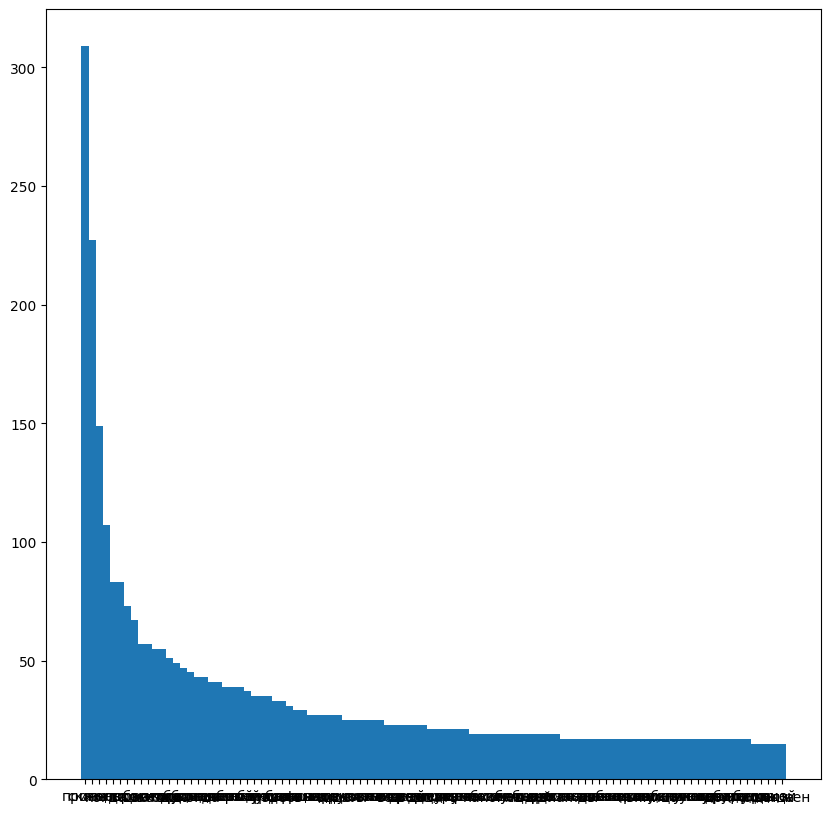

In [13]:
# https://pythonspot.com/matplotlib-bar-chart/
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10]


N = 100
objects = list(df.index)[:N]
y_pos = df['Frequency'].values[:N]
performance = [400, 300,200,100,50,25,10]

plt.bar( objects,y_pos, width=(3+N)/N, align='center')

plt.show()